In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Kernel PCA
Let's take a dataset $\mathbf{X}$ where

* $d$: no. of features
* $n$: no. of datapoints
$$
X=\left [
\begin{array}{ccccc}
    | & | & | & & | \\
    x_1 & x_2 & x_3 & \ldots & x_4 \\
    | & | & | & & |
\end{array}
\right ]
$$

In [2]:
X = np.array([[1, 1],[2, 4],[-1, 1],[-2, 4]]).T

In [3]:
X

array([[ 1,  2, -1, -2],
       [ 1,  4,  1,  4]])

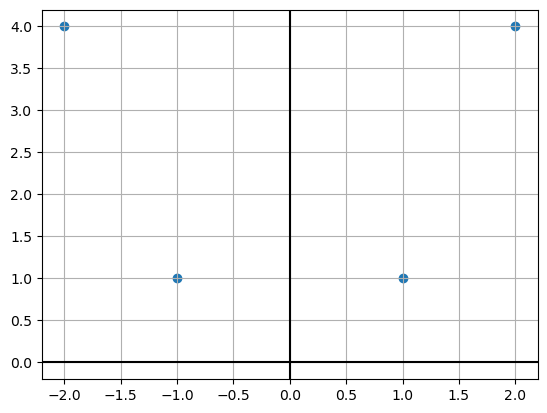

In [4]:
plt.scatter(X[0, :], X[1, :])
plt.axhline(c='k')
plt.axvline(c='k');
plt.grid();

### Step 1: Calculate $\mathbf{K} \in \mathbb{R}^{n \times n}$ using a kernel function where $\mathbf{K}_{ij}=k(x_i,x_j)$.

In [5]:
def polynomial_kernel(A,B,k): 
    # (x^T x' + 1)^p
    return(A.T @ B + 1)**k

K_poly=polynomial_kernel(X,X,2)

In [7]:
K_poly

array([[  9,  49,   1,   9],
       [ 49, 441,   9, 169],
       [  1,   9,   9,  49],
       [  9, 169,  49, 441]])

### Step 2: Center the kernel using the following formula.
$$
\mathbf{K}^C=\mathbf{K}-\mathbf{I}\mathbf{K}-\mathbf{K}\mathbf{I}+\mathbf{I}\mathbf{K}\mathbf{I}
$$
where $\mathbf{K}^C$ is the centered kernel, and $\mathbf{I} \in \mathbb{R}^{n \times n}$ where all the elements are $\frac{1}{n}$.

In [11]:
def center_K(K): # K is n x n
    n=K.shape[0]
    I=np.ones((n,n)) / n
    # K - IK - KI + IKI # (n x n) - (n x n) - n x n + n x n
    return K - I@K - K@I + I@K@I

K_centered=center_K(K_poly)
    
    

In [12]:
K_centered

array([[ 67., -43.,  59., -83.],
       [-43., 199., -83., -73.],
       [ 59., -83.,  67., -43.],
       [-83., -73., -43., 199.]])

### Step 3: Compute the eigenvectors $\{\beta _1, \beta _2, \ldots, \beta _n\}$ and eigenvalues $\{n\lambda _1, n\lambda _2, \ldots, n\lambda _n\}$ of $K^C$ and normalize to get
$$
\forall u \hspace{2em} \alpha _u = \frac{\beta _u}{\sqrt{n \lambda _u}}
$$

In [24]:
lam,beta= np.linalg.eigh(K_centered)
lam, beta = lam[::-1][:-1], beta[:,::-1][:,:-1]

In [25]:
lam,beta

(array([277.9275172, 252.       ,   2.0724828]),
 array([[ 0.10365278, -0.5       , -0.69946844],
        [ 0.69946844,  0.5       ,  0.10365278],
        [-0.10365278, -0.5       ,  0.69946844],
        [-0.69946844,  0.5       , -0.10365278]]))

In [30]:
alpha=beta/np.sqrt(lam.reshape((1,-1)))

In [31]:
alpha

array([[ 0.00621749, -0.03149704, -0.48587288],
       [ 0.0419568 ,  0.03149704,  0.0720005 ],
       [-0.00621749, -0.03149704,  0.48587288],
       [-0.0419568 ,  0.03149704, -0.0720005 ]])

### Step 3: Compute $\sum _{j=1}^{n}\mathbf{\alpha }_{kj}\mathbf{K}_{ij}^{C} \ \ \forall k$

\begin{equation*}
\mathbf{x}_{i} \in \mathbb{R}^{d}\rightarrow \left[\begin{array}{ c c c c }
\sum\limits _{j=1}^{n}\mathbf{\alpha }_{1j}\mathbf{K}_{ij}^{C} & \sum\limits _{j=1}^{n}\mathbf{\alpha }_{2j}\mathbf{K}_{ij}^{C} & \dotsc  & \sum\limits _{j=1}^{n}\mathbf{\alpha }_{nj}\mathbf{K}_{ij}^{C}
\end{array}\right]
\end{equation*}

In [32]:
X_prime=K_centered@alpha
X_prime

array([[  1.72801191,  -7.93725393,  -1.00696319],
       [ 11.66094908,   7.93725393,   0.14921979],
       [ -1.72801191,  -7.93725393,   1.00696319],
       [-11.66094908,   7.93725393,  -0.14921979]])

# Kernel PCA on Swiss Roll Dataset